In [139]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [140]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                            average_precision_score)

In [141]:
import numpy as np 

In [142]:
import pandas as pd
%matplotlib inline

1)Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.
date - дата; Temperature -температура; Humidity - влажность; Light - cвет; CO2 - CO2; HumidityRatio - влажность воздуха; Occupancy - занятость;

In [143]:
pass_data1 = pd.read_csv('datatest.txt')
pass_data1

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [144]:
pass_data1.shape

(2665, 7)

2)Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;


In [145]:
pass_data1.drop_duplicates()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [146]:
pass_data1.shape

(2665, 7)

3)Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

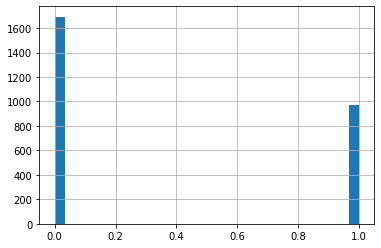

In [147]:
pass_data1.Occupancy.hist(bins=30)

Соотношение количество элементов заметно отличается, поэтому будем считать, что классы несбалансированы.

4)Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

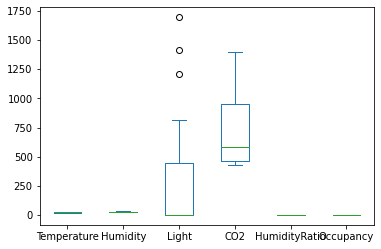

In [148]:
import seaborn as sns
pass_data1.plot.box()

In [149]:
numerical_columns = [i for i in pass_data1.columns if pass_data1[i].dtype.name != 'object']
categorial_columns = [i for i in pass_data1.columns if pass_data1[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
categorial:  ['date']


In [150]:
#нормализация количественных признаков
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pass_data1[numerical_columns] = scaler.fit_transform(pass_data1[numerical_columns])

pass_data1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,0.831683,0.445132,0.344793,0.330033,0.704212,1.0
141,2015-02-02 14:19:59,0.835960,0.447053,0.340787,0.341523,0.708308,1.0
142,2015-02-02 14:21:00,0.838812,0.440651,0.337409,0.351030,0.704689,1.0
143,2015-02-02 14:22:00,0.837030,0.429448,0.290912,0.356245,0.694383,1.0
144,2015-02-02 14:23:00,0.844515,0.437450,0.287877,0.360605,0.705384,1.0


Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются

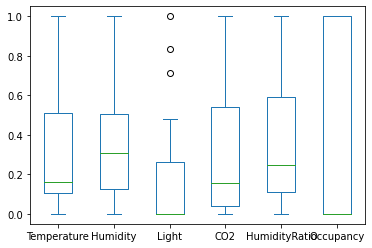

In [151]:
pass_data1.plot.box()

5) Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [152]:
pass_data1.nunique()

date             2665
Temperature       335
Humidity          725
Light             428
CO2              1894
HumidityRatio    1505
Occupancy           2
dtype: int64

In [153]:
for i in categorial_columns:
    print(i,': ', pass_data1[i].unique())

date :  ['2015-02-02 14:19:00' '2015-02-02 14:19:59' '2015-02-02 14:21:00' ...
 '2015-02-04 10:40:59' '2015-02-04 10:41:59' '2015-02-04 10:43:00']


In [154]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder() 
pass_data1['date'] = lb_make.fit_transform(pass_data1['Temperature'])
pass_data1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,312,0.831683,0.445132,0.344793,0.330033,0.704212,1.0
141,313,0.835960,0.447053,0.340787,0.341523,0.708308,1.0
142,315,0.838812,0.440651,0.337409,0.351030,0.704689,1.0
143,314,0.837030,0.429448,0.290912,0.356245,0.694383,1.0
144,318,0.844515,0.437450,0.287877,0.360605,0.705384,1.0


6) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

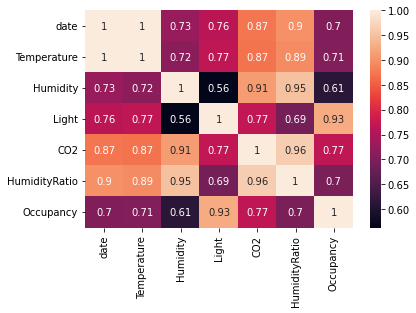

In [155]:
sns.heatmap(pass_data1.corr(),annot=True)#функция для отображения коэффициента корреляции

In [156]:
pass_data2 = pass_data1.drop('date',axis = 1)

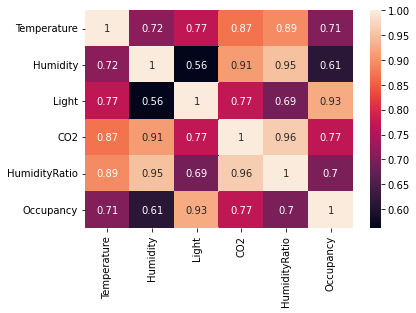

In [157]:
sns.heatmap(pass_data2.corr(), annot=True)

7) Заполните пропущенные значения в данных;

In [158]:
pass_data1.isnull()#отсутствие данных

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False
142,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2800,False,False,False,False,False,False,False
2801,False,False,False,False,False,False,False
2802,False,False,False,False,False,False,False
2803,False,False,False,False,False,False,False


In [159]:
pass_data1.shape

(2665, 7)

In [160]:
pass_data1.count()#пропусков нет

date             2665
Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
Occupancy        2665
dtype: int64

8) Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

In [161]:
from sklearn.linear_model import Perceptron

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [163]:
X = pass_data1.drop(['date'], axis=1)#признаки
Y = pass_data1['Occupancy']#классы
X.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [164]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [165]:
ppn = Perceptron(max_iter=500, eta0 =1, penalty='l2', random_state = 1) #классификатор
ppn.fit(x_train, y_train) #обучения
ppn_predict = ppn.predict(x_test) #предсказание y на данных x
print('Оценка точности: %.5f' % accuracy_score(y_test, ppn_predict))

Оценка точности: 1.00000


In [166]:
# Метод GridSearchCV
ppn1 = {'max_iter': range(500,2000,50), 'penalty': ('l2', 'l1', 'elasticnet')}
ppn2 = GridSearchCV(ppn, ppn1, cv=5, n_jobs=-1, verbose=True)
ppn2.fit(x_train, y_train)
print('Лучший набор:', ppn2.best_params_)
print('Лучшая точность:', ppn2.best_score_)
print('Значение точности: %.5f' % accuracy_score(y_test, ppn_predict))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Лучший набор: {'max_iter': 500, 'penalty': 'l2'}
Лучшая точность: 1.0
Значение точности: 1.00000


In [167]:
# Перекрестный метод
all_accuracies = cross_val_score(estimator=ppn, X=x_train, y=y_train, cv=10)
print('Точность для cv=10:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=10: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Среднее значение точности: 1.0


In [168]:
# Логический классификатор (бинарное решающее дерево)
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('Оценка точности: %.5f' % accuracy_score(y_test, y_pred))

Оценка точности: 1.00000


In [169]:
# Метод GridSearchCV
tree1 = {'max_depth': range(1,6), 'max_features': range(1,6)}
tree2 = GridSearchCV(tree, tree1, cv=10, n_jobs=-1, verbose=True)
tree2.fit(x_train, y_train)
print('Лучший набор:', tree2.best_params_)
print('Лучшая точность:', tree2.best_score_)
print('Значение точности: %.5f' % accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Лучший набор: {'max_depth': 1, 'max_features': 5}
Лучшая точность: 1.0
Значение точности: 1.00000


In [170]:
# Перекрестный метод
all_accuracies = cross_val_score(estimator=tree, X=x_train, y=y_train, cv=10)
print('Точность для cv=10:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=10: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Среднее значение точности: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


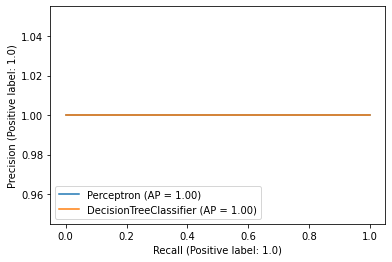

In [171]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
#полнота и точность
i = plot_precision_recall_curve(ppn, x_test, y_test)
g = plot_precision_recall_curve(tree, x_test, y_test, ax = i.ax_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


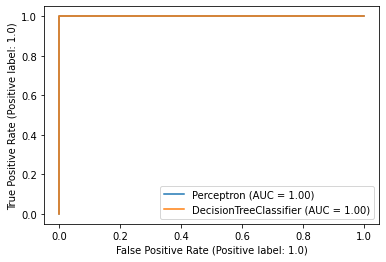

In [172]:
#доля правильных и доля неправильных
i = plot_roc_curve(ppn, x_test, y_test)
g = plot_roc_curve(tree, x_test, y_test, ax = i.ax_)